In [1]:
!pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Processing /home/jmulagi/.cache/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155/nltk-3.5-py3-none-any.whl
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached regex-2021.3.17-cp38-cp38-manylinux2014_x86_64.whl (737 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached tqdm-4.59.0-py2.py3-none-any.whl (74 kB)


In [2]:
!pip install tweepy


  Using cached tweepy-3.10.0-py2.py3-none-any.whl (30 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached urllib3-1.26.4-py2.py3-none-any.whl (153 kB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


In [3]:
from textblob import TextBlob

In [4]:
import sys


In [5]:
import tweepy

In [6]:
!pip install matplotlib

  Using cached matplotlib-3.4.1-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached Pillow-8.2.0-cp38-cp38-manylinux1_x86_64.whl (3.0 MB)
  Using cached numpy-1.20.2-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [7]:
import matplotlib.pyplot as plt

In [8]:
!pip install pandas

  Using cached pandas-1.2.3-cp38-cp38-manylinux1_x86_64.whl (9.7 MB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


In [9]:
import numpy as np


In [10]:
import os

In [11]:
import nltk


In [12]:
!pip install pycountry

Processing /home/jmulagi/.cache/pip/wheels/09/eb/0d/4ee773c6a4aadc2a43cb5c1d07f268f13c4cdc0eec88e7c1ef/pycountry-20.7.3-py2.py3-none-any.whl


In [13]:
import pycountry

In [14]:
import re

In [15]:
import string

In [16]:
!pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)


In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
from PIL import Image

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [21]:
!pip install langdetect

Processing /home/jmulagi/.cache/pip/wheels/1e/80/23/0a24928ec3a3906ff5027f38d2fea824e7e97f2ba7c83d91e3/langdetect-1.0.8-py3-none-any.whl


In [22]:
from langdetect import detect


In [23]:
import pandas as pd


In [24]:
import pycountry


In [25]:
from langdetect import detect

In [26]:
from nltk.stem import SnowballStemmer

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
!pip install sklearn

Processing /home/jmulagi/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897/sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.24.1-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached scipy-1.6.2-cp38-cp38-manylinux1_x86_64.whl (27.2 MB)


In [30]:
consumerKey = "KkFRbQpwS8JncbWNnM0v8BV78"
consumerSecret = "70xy7O72aLTx1hX3vqCGRpezhYYBqQaCKyLhO05mhTb1oH0Ceq"
accessToken = "1183387752-PvTJTXRS8MZVaTkAlcLGWxo71j4Iz3xUNbLia4w"
accessTokenSecret = "x0nMDC15uin9l5ZQlu1byqGaXkrD3bSkENIi1hOwJlCkn"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [44]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Premier League
Please enter how many tweets to analyze: 50


In [45]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  50
positive number:  18
negative number:  3
neutral number:  29


In [46]:
tweet_list

,0
0,RT @brfootball: Thomas Tuchel is named Premier...
1,RT @Squawka: ⛔️ Liverpool 0-1 Chelsea\n⛔️ Chel...
2,James garner must go on loan in the premier le...
3,RT @LCFC: 5️⃣ Premier League goals in March ☑️...
4,RT @OptaJoe: 65 - Jack Grealish has created 65...
5,RT @OptaJoe: 5 - Kelechi Ịheanachọ (@67Kelechi...
6,RT @LDNFootbalI: 🚨 Thomas Tuchel is the Premie...
7,RT @LCFC: Leicester City striker @67Kelechi’s ...
8,RT @salimosaid: Invitation to tender for broad...
9,RT @SkySportsPL: Leicester City striker Kelech...


In [47]:
tweet_list.drop_duplicates(inplace = True)

In [48]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @brfootball: Thomas Tuchel is named Premier...,RT @brfootball: Thomas Tuchel is named Premier...
1,RT @Squawka: ⛔️ Liverpool 0-1 Chelsea\n⛔️ Chel...,RT @Squawka: ⛔️ Liverpool 0-1 Chelsea\n⛔️ Chel...
2,James garner must go on loan in the premier le...,James garner must go on loan in the premier le...
3,RT @LCFC: 5️⃣ Premier League goals in March ☑️...,RT @LCFC: 5️⃣ Premier League goals in March ☑️...
4,RT @OptaJoe: 65 - Jack Grealish has created 65...,RT @OptaJoe: 65 - Jack Grealish has created 65...
5,RT @OptaJoe: 5 - Kelechi Ịheanachọ (@67Kelechi...,RT @OptaJoe: 5 - Kelechi Ịheanachọ (@67Kelechi...
6,RT @LDNFootbalI: 🚨 Thomas Tuchel is the Premie...,RT @LDNFootbalI: 🚨 Thomas Tuchel is the Premie...
7,RT @LCFC: Leicester City striker @67Kelechi’s ...,RT @LCFC: Leicester City striker @67Kelechi’s ...
8,RT @salimosaid: Invitation to tender for broad...,RT @salimosaid: Invitation to tender for broad...
9,RT @SkySportsPL: Leicester City striker Kelech...,RT @SkySportsPL: Leicester City striker Kelech...


In [49]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(50)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @brfootball: Thomas Tuchel is named Premier...,RT @brfootball: Thomas Tuchel is named Premier...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @Squawka: ⛔️ Liverpool 0-1 Chelsea\n⛔️ Chel...,RT @Squawka: ⛔️ Liverpool 0-1 Chelsea\n⛔️ Chel...,-0.071429,0.214286,neutral,0.000,1.000,0.000,0.0000
2,James garner must go on loan in the premier le...,James garner must go on loan in the premier le...,0.166667,0.166667,positive,0.000,0.917,0.083,0.2023
3,RT @LCFC: 5️⃣ Premier League goals in March ☑️...,RT @LCFC: 5️⃣ Premier League goals in March ☑️...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @OptaJoe: 65 - Jack Grealish has created 65...,RT @OptaJoe: 65 - Jack Grealish has created 65...,0.125000,0.458333,positive,0.000,0.780,0.220,0.6369
5,RT @OptaJoe: 5 - Kelechi Ịheanachọ (@67Kelechi...,RT @OptaJoe: 5 - Kelechi Ịheanachọ (@67Kelechi...,0.250000,0.750000,neutral,0.000,1.000,0.000,0.0000
6,RT @LDNFootbalI: 🚨 Thomas Tuchel is the Premie...,RT @LDNFootbalI: 🚨 Thomas Tuchel is the Premie...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @LCFC: Leicester City striker @67Kelechi’s ...,RT @LCFC: Leicester City striker @67Kelechi’s ...,0.900000,1.000000,positive,0.000,0.853,0.147,0.5859
8,RT @salimosaid: Invitation to tender for broad...,RT @salimosaid: Invitation to tender for broad...,0.000000,0.000000,positive,0.000,0.922,0.078,0.1779
9,RT @SkySportsPL: Leicester City striker Kelech...,RT @SkySportsPL: Leicester City striker Kelech...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


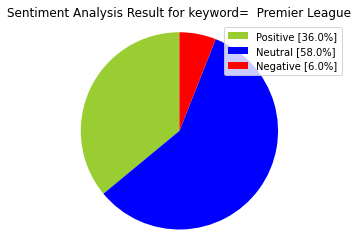

In [50]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()